# <a>Análises do Enem 2021<a>

Diferente do  notebook de 2019, que seguiu um roteiro preparado pelo curso.
Neste notebook tentarei encontrar respostas a questionamentos que tive durante o estudo do curso.

Além de outras perguntas e respostas, este notebook se concentra no Enem de 2021, para obter respostas mais recentes e quem sabe futuramente realizar comparações entre os anos. 

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Pré-definindo configurações de visualização

In [3]:
# Configurando o número de colunas mostrado
pd.set_option('display.max_columns',None)
# Configurando pandas para não mostrar notação cientifica para os números
pd.set_option('display.float_format',lambda x: '%.2f'%x)
# Configurando o estilo ggplot 
plt.style.use('ggplot')

## Tratando os dados

### Lendo os dados

In [4]:
df_raw = pd.read_parquet(r'C:\Users\igors\OneDrive\Documents\Estudo_python\Jornada_cientista_de_dados\Projeto_1\dados\MICRODADOS_ENEM_2021.parquet')
df_raw.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.00,892.00,NaN,NaN,574.60,472.60,NaN,None,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,None,1,None,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,None,1.00,140.00,120.00,120.00,180.00,200.00,760.00,F,F,B,B,3.00,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.00,882.00,891.00,901.00,505.90,551.80,498.30,461.50,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.00,0,2304202.00,Crato,23.00,CE,2.00,1.00,1.00,2304202,Crato,23,CE,1,1,1,1,911.00,880.00,890.00,902.00,580.70,678.90,638.90,659.50,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.00,0,2311603.00,Redenção,23.00,CE,2.00,1.00,1.00,2300150,Acarape,23,CE,1,1,1,1,912.00,882.00,891.00,901.00,497.70,532.40,457.60,582.60,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [8]:
df_raw.dtypes

NU_INSCRICAO        int64
NU_ANO              int64
TP_FAIXA_ETARIA     int64
TP_SEXO            object
TP_ESTADO_CIVIL     int64
                    ...  
Q021               object
Q022               object
Q023               object
Q024               object
Q025               object
Length: 76, dtype: object

In [9]:
# Agrupando colunas de respostas em uma variavel só
coluna_respostas = [coluna for coluna in df_raw.columns if coluna.startswith('TX_')]
coluna_respostas

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [12]:
remover = df_raw[['NU_INSCRICAO','NU_ANO'] + coluna_respostas]
df_enem = df_raw.drop(remover,axis=1)

## <a>Diferença nas notas entre alunos de escolas publicas e outras<a>

* 1 - Federal
* 2 - Estadual
* 3 - Municipal
* 4 - Privada

In [43]:
colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
colunas_notas = colunas_notas[:4] + colunas_notas[-1:]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

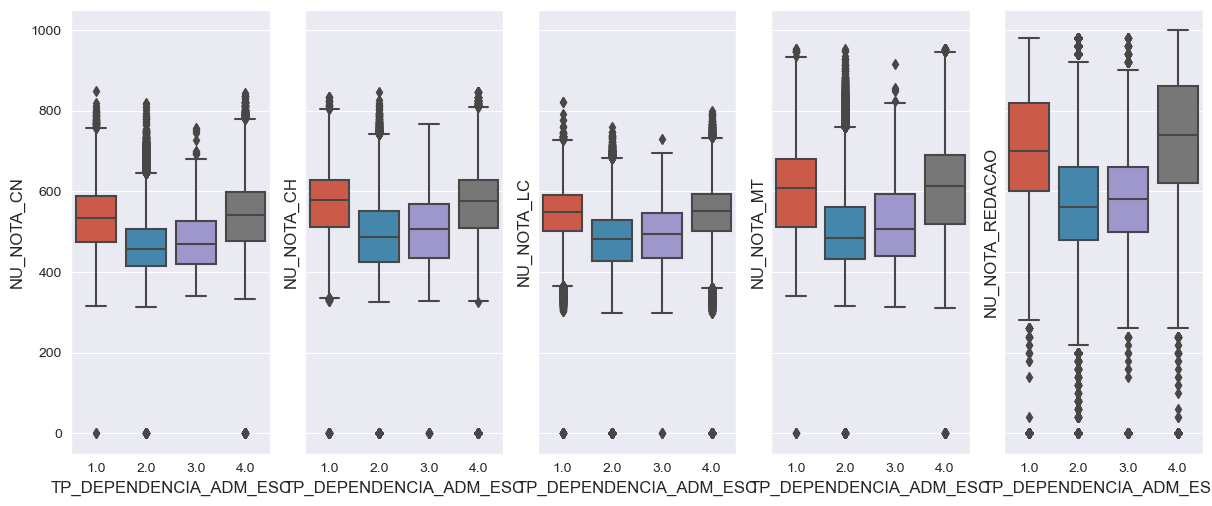

In [46]:
sns.set_style('darkgrid')
figura,graficos = plt.subplots(1,5,sharey=True, figsize=(12,5))
plt.tight_layout()

for i in range(5):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem,x='TP_DEPENDENCIA_ADM_ESC' ,y=coluna_1, ax=graficos[i])

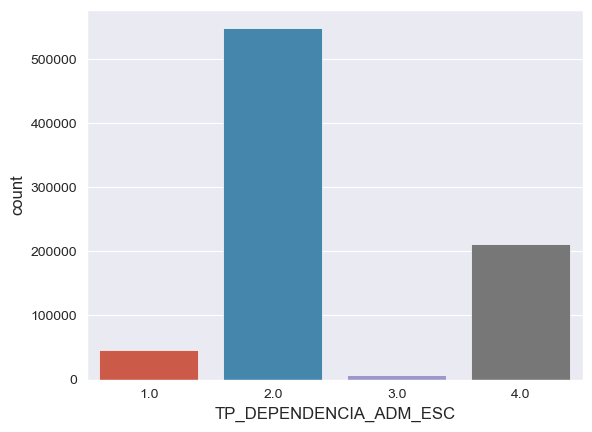

In [47]:
sns.countplot(data=df_enem,x='TP_DEPENDENCIA_ADM_ESC',);


## <a>Evasão entre os dias de prova<a>

* 0 Faltou
* 1 presente
* 2 eliminado

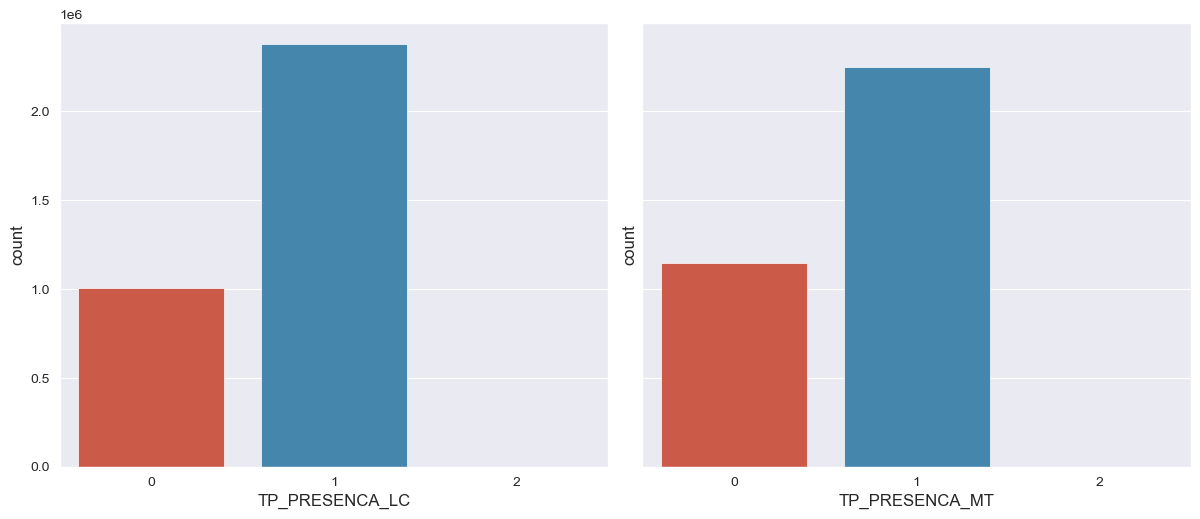

In [70]:
sns.set_style('darkgrid')
figura,graficos = plt.subplots(1,2,sharey=True, figsize=(12,5))
plt.tight_layout()


sns.countplot(data=df_enem,x='TP_PRESENCA_LC',ax=graficos[0])
sns.countplot(data=df_enem,x='TP_PRESENCA_MT',ax=graficos[1]);



## <a>Residencia com acesso a internet gera nota maior <a>

Lembrando que a prova ENEM 2021, foi realizada em um momento que muitos ainda possuiam algumas restrições pela covid-19

Na sua residencia tem acesso à internet ? 
* A - não
* B - sim

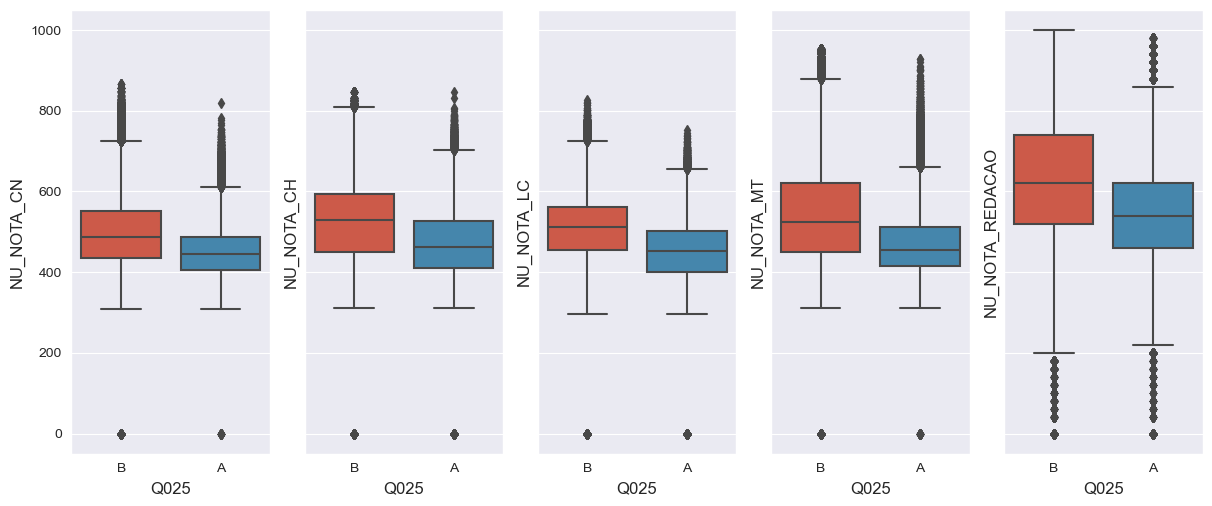

In [71]:
sns.set_style('darkgrid')
figura,graficos = plt.subplots(1,5,sharey=True, figsize=(12,5))
plt.tight_layout()

for i in range(5):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem,x='Q025' ,y=coluna_1, ax=graficos[i])

## <a>Migração para realização da prova<a>

In [86]:
df_enem['mesmo_municipio']  = df_enem['NO_MUNICIPIO_ESC'] == df_enem['NO_MUNICIPIO_PROVA']

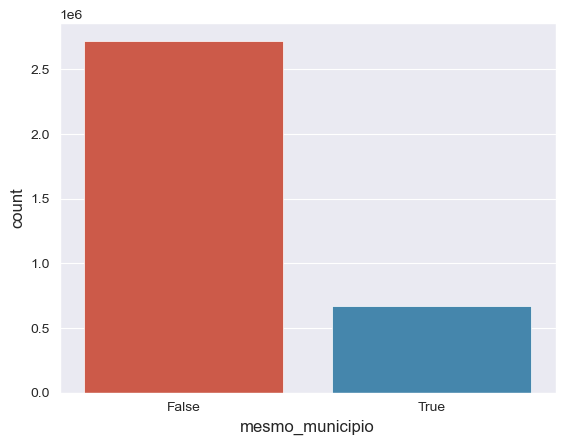

In [90]:

sns.countplot(data=df_enem, x='mesmo_municipio');

## <a>Qual a lingua mais escolhida para fazer a prova<a>

Lingua
* 0 - Inglês
* 1 - Espanhol

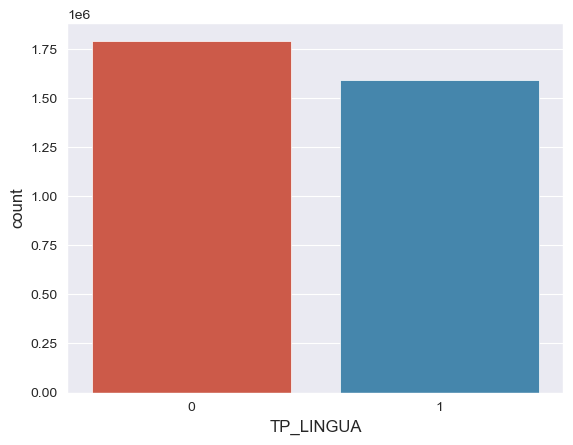

In [89]:
# Até que série seu pai, ou homem responsável por você, estudou ? 
sns.countplot(data=df_enem, x='TP_LINGUA');